In [11]:
import pandas as pd

# 定义列名
column_names = ['IMSI', 'Timestamp', 'Longitude', 'Latitude']

# 读取CSV文件，header=None表示文件没有标题行，names参数指定列名
data = pd.read_csv('xinlin.csv', header=None, names=column_names)

# 查看数据框架的前几行以确认数据已正确读取
print(df.head())

   IMSI          Timestamp   Longitude   Latitude
0  4406  20240407 23:47:46  116.254753  39.887227
1   134  20240407 23:47:47  116.294670  39.857790
2  1316  20240407 23:47:51  116.281807  39.948059
3  4453  20240407 23:47:54  116.185365  39.921688
4  1842  20240407 23:47:55  116.336388  39.790555


In [12]:
# 转换时间戳为datetime类型
data['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 如果需要，可以进一步分解日期和时间
data['Date'] = data['Timestamp'].dt.date
data['Time'] = data['Timestamp'].dt.time
print(data.head())

   IMSI           Timestamp   Longitude   Latitude        Date      Time
0  4406 2024-04-07 23:47:46  116.254753  39.887227  2024-04-07  23:47:46
1   134 2024-04-07 23:47:47  116.294670  39.857790  2024-04-07  23:47:47
2  1316 2024-04-07 23:47:51  116.281807  39.948059  2024-04-07  23:47:51
3  4453 2024-04-07 23:47:54  116.185365  39.921688  2024-04-07  23:47:54
4  1842 2024-04-07 23:47:55  116.336388  39.790555  2024-04-07  23:47:55


In [16]:
import pandas as pd

# 假设data是已经加载的DataFrame，并且已经包含了Date和Time列
# 将Timestamp列转换为datetime类型，如果还没有转换的话
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# 根据IMSI和经纬度进行分组
grouped = data.groupby(['IMSI', 'Longitude', 'Latitude'])

# 初始化一个空的列表来存储结果DataFrame
result_list = []

# 遍历每个分组
for name, group in grouped:
    # name是一个元组，包含IMSI, Longitude和Latitude
    imsi, longitude, latitude = name
    
    # 对每个IMSI和地点的记录进行排序（这一步可能是多余的，因为数据已经排序）
    sorted_group = group.sort_values(by='Timestamp')
    
    # 到达时间是每个地点的第一条记录
    arrival_time = sorted_group.iloc[0]['Timestamp']
    
    # 离开时间是每个地点的最后一条记录
    departure_time = sorted_group.iloc[-1]['Timestamp']
    
    # 停留时间计算
    stay_duration = (departure_time - arrival_time).total_seconds() / 3600  # 转换为小时
    
    # 创建一个包含当前分组结果的DataFrame
    result_df = pd.DataFrame({
        'IMSI': [imsi],
        'Longitude': [longitude],
        'Latitude': [latitude],
        'Arrival Time': [arrival_time],
        'Departure Time': [departure_time],
        'Stay Duration (hours)': [stay_duration]
    })
    
    # 将结果DataFrame添加到列表中
    result_list.append(result_df)

# 使用pd.concat一次性将所有结果DataFrame合并成一个新的DataFrame
result = pd.concat(result_list, ignore_index=True)

# 显示结果
print(result)

         IMSI   Longitude   Latitude        Arrival Time      Departure Time  \
0           1  116.620631  40.323591 2024-04-08 11:01:40 2024-04-08 14:12:09   
1           1  116.620769  40.338426 2024-04-08 06:51:01 2024-04-08 16:41:31   
2           1  116.620871  40.333021 2024-04-08 13:34:47 2024-04-08 13:35:10   
3           1  116.620890  40.332967 2024-04-08 13:30:32 2024-04-08 13:30:32   
4           1  116.622777  40.334444 2024-04-08 12:24:41 2024-04-08 19:55:25   
...       ...         ...        ...                 ...                 ...   
265800  10000  116.319351  39.944201 2024-04-08 20:21:14 2024-04-08 20:21:46   
265801  10000  116.321120  39.948470 2024-04-07 23:51:56 2024-04-08 22:51:19   
265802  10000  116.322500  39.939371 2024-04-07 23:56:06 2024-04-08 05:49:24   
265803  10000  116.323640  39.950650 2024-04-08 20:35:27 2024-04-08 20:36:47   
265804  10000  116.324708  39.947577 2024-04-08 20:53:30 2024-04-08 20:53:30   

        Stay Duration (hours)  
0      

In [17]:
#2. 初步查看数据
print(result.head())  # 查看前五行数据
print(result.tail())  # 查看后五行数据
print(result.info())  # 查看数据框架信息，包括列名和数据类型
print(result.describe())  # 查看数值型列的描述性统计

   IMSI   Longitude   Latitude        Arrival Time      Departure Time  \
0     1  116.620631  40.323591 2024-04-08 11:01:40 2024-04-08 14:12:09   
1     1  116.620769  40.338426 2024-04-08 06:51:01 2024-04-08 16:41:31   
2     1  116.620871  40.333021 2024-04-08 13:34:47 2024-04-08 13:35:10   
3     1  116.620890  40.332967 2024-04-08 13:30:32 2024-04-08 13:30:32   
4     1  116.622777  40.334444 2024-04-08 12:24:41 2024-04-08 19:55:25   

   Stay Duration (hours)  
0               3.174722  
1               9.841667  
2               0.006389  
3               0.000000  
4               7.512222  
         IMSI   Longitude   Latitude        Arrival Time      Departure Time  \
265800  10000  116.319351  39.944201 2024-04-08 20:21:14 2024-04-08 20:21:46   
265801  10000  116.321120  39.948470 2024-04-07 23:51:56 2024-04-08 22:51:19   
265802  10000  116.322500  39.939371 2024-04-07 23:56:06 2024-04-08 05:49:24   
265803  10000  116.323640  39.950650 2024-04-08 20:35:27 2024-04-08 20:36

In [18]:
# 假设result是最终得到的DataFrame

# 将DataFrame保存到CSV文件，不包含索引
result.to_csv('xinlin_stay_hours.csv', index=False, encoding='utf-8-sig')

print("数据已保存到 'xinlin_stay_hours.csv' 文件中。")

数据已保存到 'xinlin_stay_hours.csv' 文件中。


In [20]:
#data_2观察排序后数据
#查看原数据的排序后数据
import pandas as pd

# 定义列名
column_names = ['IMSI', 'Timestamp', 'Longitude', 'Latitude']

# 读取CSV文件，header=None表示文件没有标题行，names参数指定列名
data_2 = pd.read_csv('xinlin.csv', header=None, names=column_names)

# 2. 数据分组：根据IMSI和经纬度对数据进行分组
grouped = data_2.groupby(['IMSI', 'Longitude', 'Latitude'])

# 3. 排序：在每个IMSI的分组内，根据时间戳对数据进行排序
# 注意：这里我们不需要单独对每个分组排序，因为我们在读取数据时已经指定了排序的列
# 如果需要在分组后排序，可以使用grouped.apply(lambda x: x.sort_values(by='Timestamp'))

# 4. 展示前10行：遍历每个分组并展示前10行数据
for name, group in grouped:
    print(f"IMSI: {name[0]}, Longitude: {name[1]}, Latitude: {name[2]}")
    print(group.head(10))
    print()  # 打印空行以便区分不同的IMSI分组

IMSI: 1, Longitude: 116.620631, Latitude: 40.323591
         IMSI          Timestamp   Longitude   Latitude
1057847     1  20240408 11:01:40  116.620631  40.323591
1059683     1  20240408 11:02:46  116.620631  40.323591
1065995     1  20240408 11:06:46  116.620631  40.323591
1071295     1  20240408 11:09:58  116.620631  40.323591
1072838     1  20240408 11:10:59  116.620631  40.323591
1304839     1  20240408 13:43:11  116.620631  40.323591
1306923     1  20240408 13:44:34  116.620631  40.323591
1307607     1  20240408 13:44:58  116.620631  40.323591
1309195     1  20240408 13:45:57  116.620631  40.323591
1311683     1  20240408 13:47:36  116.620631  40.323591

IMSI: 1, Longitude: 116.620769, Latitude: 40.338426
         IMSI          Timestamp   Longitude   Latitude
655699      1  20240408 06:51:01  116.620769  40.338426
658825      1  20240408 06:52:52  116.620769  40.338426
661315      1  20240408 06:53:58  116.620769  40.338426
661632      1  20240408 06:54:11  116.620769  40.338426

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



         IMSI          Timestamp   Longitude   Latitude
1352573  1590  20240408 14:14:28  116.327001  39.710521
1372755  1590  20240408 14:28:52  116.327001  39.710521

IMSI: 1590, Longitude: 116.332565, Latitude: 39.723663
         IMSI          Timestamp   Longitude   Latitude
1348683  1590  20240408 14:11:52  116.332565  39.723663

IMSI: 1590, Longitude: 116.333207, Latitude: 39.721009
         IMSI          Timestamp   Longitude   Latitude
1375063  1590  20240408 14:30:37  116.333207  39.721009

IMSI: 1590, Longitude: 116.335833, Latitude: 39.763055
         IMSI          Timestamp   Longitude   Latitude
1389070  1590  20240408 14:41:03  116.335833  39.763055

IMSI: 1590, Longitude: 116.33848, Latitude: 39.73085
         IMSI          Timestamp  Longitude  Latitude
1340291  1590  20240408 14:06:25  116.33848  39.73085
1340532  1590  20240408 14:06:33  116.33848  39.73085

IMSI: 1590, Longitude: 116.338481, Latitude: 39.730851
         IMSI          Timestamp   Longitude   Latitude


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [21]:
# 4. 展示前10行：遍历每个分组并展示前10行数据
for name, group in grouped:
    print(f"IMSI: {name[0]}, Longitude: {name[1]}, Latitude: {name[2]}")
    print(group.head(100))
    print()  # 打印空行以便区分不同的IMSI分组

IMSI: 1, Longitude: 116.620631, Latitude: 40.323591
         IMSI          Timestamp   Longitude   Latitude
1057847     1  20240408 11:01:40  116.620631  40.323591
1059683     1  20240408 11:02:46  116.620631  40.323591
1065995     1  20240408 11:06:46  116.620631  40.323591
1071295     1  20240408 11:09:58  116.620631  40.323591
1072838     1  20240408 11:10:59  116.620631  40.323591
1304839     1  20240408 13:43:11  116.620631  40.323591
1306923     1  20240408 13:44:34  116.620631  40.323591
1307607     1  20240408 13:44:58  116.620631  40.323591
1309195     1  20240408 13:45:57  116.620631  40.323591
1311683     1  20240408 13:47:36  116.620631  40.323591
1325657     1  20240408 13:56:48  116.620631  40.323591
1329184     1  20240408 13:59:11  116.620631  40.323591
1337487     1  20240408 14:04:36  116.620631  40.323591
1339099     1  20240408 14:05:37  116.620631  40.323591
1340237     1  20240408 14:06:22  116.620631  40.323591
1345101     1  20240408 14:09:27  116.620631  40.323

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



         IMSI          Timestamp   Longitude  Latitude
4639      657  20240407 23:53:41  116.162878  39.86851
106166    657  20240408 01:09:24  116.162878  39.86851
151750    657  20240408 01:41:39  116.162878  39.86851
157570    657  20240408 01:45:35  116.162878  39.86851
169325    657  20240408 01:53:56  116.162878  39.86851
192385    657  20240408 02:09:38  116.162878  39.86851
193047    657  20240408 02:09:56  116.162878  39.86851
197292    657  20240408 02:12:47  116.162878  39.86851
197709    657  20240408 02:13:05  116.162878  39.86851
224569    657  20240408 02:30:22  116.162878  39.86851
225069    657  20240408 02:30:40  116.162878  39.86851
413140    657  20240408 04:30:52  116.162878  39.86851
413631    657  20240408 04:31:05  116.162878  39.86851
924390    657  20240408 09:36:22  116.162878  39.86851
935705    657  20240408 09:43:19  116.162878  39.86851
940413    657  20240408 09:46:14  116.162878  39.86851
949665    657  20240408 09:52:05  116.162878  39.86851
959253    

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [26]:
import pandas as pd

# 1. 读取数据
data = pd.read_csv('xinlin.csv', names=['IMSI', 'Timestamp', 'Longitude', 'Latitude'])

# 2. 转换Timestamp列为datetime类型
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# 3. 按IMSI进行排序
data.sort_values(by=['IMSI', 'Timestamp'], inplace=True)

# 初始化一个空列表来收集结果
results = []

# 4. 遍历每个IMSI分组，计算停留时间
for imsi, group in data.groupby('IMSI'):
    # 初始化变量
    current_location = None
    arrival_time = None
    departure_time = None

    # 遍历分组内的数据
    for index, row in group.iterrows():
        # 检查是否为新地点
        if current_location != (row['Longitude'], row['Latitude']):
            if current_location:
                # 如果不是第一个地点，则保存上一个地点的停留时间
                results.append({
                    'IMSI': imsi,
                    'Location': current_location,
                    'Arrival Time': arrival_time,
                    'Departure Time': departure_time,
                    'Stay Duration (hours)': ((departure_time - arrival_time).total_seconds()) / 3600
                })

            # 更新当前地点信息
            current_location = (row['Longitude'], row['Latitude'])
            arrival_time = row['Timestamp']

        # 更新当前地点的离开时间
        departure_time = row['Timestamp']

    # 保存最后一个地点的停留时间
    if current_location:
        results.append({
            'IMSI': imsi,
            'Location': current_location,
            'Arrival Time': arrival_time,
            'Departure Time': departure_time,
            'Stay Duration (hours)': ((departure_time - arrival_time).total_seconds()) / 3600
        })

# 5. 使用列表创建新的DataFrame
result_df = pd.DataFrame(results)

# 显示结果
print(result_df)

# 6. 保存结果到CSV
result_df.to_csv('stay_durations.csv', index=False)

         IMSI                 Location        Arrival Time  \
0           1  (116.630642, 40.341083) 2024-04-07 23:56:47   
1           1  (116.636701, 40.340011) 2024-04-08 06:47:17   
2           1  (116.627827, 40.340945) 2024-04-08 06:48:52   
3           1  (116.620769, 40.338426) 2024-04-08 06:51:01   
4           1  (116.622827, 40.328528) 2024-04-08 08:14:53   
...       ...                      ...                 ...   
695221  10000    (116.32112, 39.94847) 2024-04-08 20:08:16   
695222  10000  (116.319351, 39.944201) 2024-04-08 20:21:14   
695223  10000    (116.32364, 39.95065) 2024-04-08 20:35:27   
695224  10000  (116.324708, 39.947577) 2024-04-08 20:53:30   
695225  10000    (116.32112, 39.94847) 2024-04-08 20:56:58   

            Departure Time  Stay Duration (hours)  
0      2024-04-08 06:13:36               6.280278  
1      2024-04-08 06:47:17               0.000000  
2      2024-04-08 06:48:52               0.000000  
3      2024-04-08 08:11:50               1.3469

In [27]:
import pandas as pd

# 读取CSV文件
result_df = pd.read_csv('stay_durations.csv')

# 确保'Arrival Time'和'Departure Time'是datetime类型
result_df['Arrival Time'] = pd.to_datetime(result_df['Arrival Time'])
result_df['Departure Time'] = pd.to_datetime(result_df['Departure Time'])

# 计算停留时间的秒数
result_df['Stay Duration (seconds)'] = (result_df['Departure Time'] - result_df['Arrival Time']).dt.total_seconds()

# 显示结果
print(result_df)

# 保存结果到新的CSV文件，可以选择覆盖原文件或保存为新的文件
result_df.to_csv('stay_durations_with_seconds.csv', index=False)

         IMSI                 Location        Arrival Time  \
0           1  (116.630642, 40.341083) 2024-04-07 23:56:47   
1           1  (116.636701, 40.340011) 2024-04-08 06:47:17   
2           1  (116.627827, 40.340945) 2024-04-08 06:48:52   
3           1  (116.620769, 40.338426) 2024-04-08 06:51:01   
4           1  (116.622827, 40.328528) 2024-04-08 08:14:53   
...       ...                      ...                 ...   
695221  10000    (116.32112, 39.94847) 2024-04-08 20:08:16   
695222  10000  (116.319351, 39.944201) 2024-04-08 20:21:14   
695223  10000    (116.32364, 39.95065) 2024-04-08 20:35:27   
695224  10000  (116.324708, 39.947577) 2024-04-08 20:53:30   
695225  10000    (116.32112, 39.94847) 2024-04-08 20:56:58   

            Departure Time  Stay Duration (hours)  Stay Duration (seconds)  
0      2024-04-08 06:13:36               6.280278                  22609.0  
1      2024-04-08 06:47:17               0.000000                      0.0  
2      2024-04-08 06:48:

In [32]:
import pandas as pd
import re

# 定义Haversine公式来计算两个经纬度之间的距离（单位：米）
def haversine(lon1, lat1, lon2, lat2):
    radius = 6371  # 地球半径，单位：千米
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return radius * c

# 读取CSV文件
df = pd.read_csv('stay_durations_with_seconds.csv')

# 使用正则表达式从'Location'列提取经纬度
df['Location'] = df['Location'].astype(str)
df[['Longitude', 'Latitude']] = df['Location'].str.extract(r'^\((\d+\.\d+),\s*(\d+\.\d+)\)$')

# 将'Longitude'和'Latitude'列的数据类型转换为float
df[['Longitude', 'Latitude']] = df[['Longitude', 'Latitude']].astype(float)

# 确保时间列是datetime类型
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'])
df['Departure Time'] = pd.to_datetime(df['Departure Time'])

# 计算速度，单位为千米/小时
df['Speed (km/h)'] = 0.0
for index in range(1, len(df)):
    current_row = df.iloc[index]
    previous_row = df.iloc[index - 1]
    
    if current_row['IMSI'] == previous_row['IMSI']:
        # 计算两点之间的距离
        distance = haversine(
            previous_row['Longitude'], previous_row['Latitude'],
            current_row['Longitude'], current_row['Latitude']
        )
        
        # 计算时间差（单位：小时）
        time_diff = (current_row['Arrival Time'] - previous_row['Departure Time']).total_seconds() / 3600
        
        # 避免除以0
        if time_diff > 0:
            df.at[index, 'Speed (km/h)'] = distance / time_diff

# 保存结果到CSV
df.to_csv('stay_durations_with_speed.csv', index=False)

/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_9670/3708618195.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMSI['Point'] = df_IMSI.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_9670/3708618195.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMSI['PrevPoint'] = df_IMSI['Point'].shift(1)
/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_9670/3708618195.py:20: SettingWithCopyWarning: 
A val

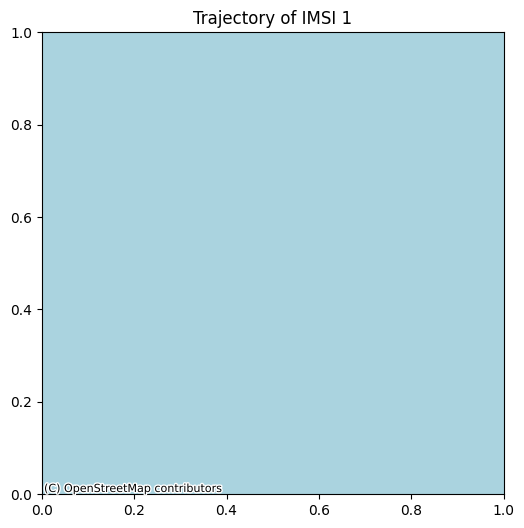

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 读取CSV文件
df = pd.read_csv('stay_durations_with_speed.csv')

# 筛选特定IMSI的行
df_IMSI = df[df['IMSI'] == 1]

# 将经纬度转换为Point对象
df_IMSI['Point'] = df_IMSI.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# 使用前一行的Point创建LineString，这里使用.shift()在Series上操作
df_IMSI['PrevPoint'] = df_IMSI['Point'].shift(1)
df_IMSI['LineString'] = df_IMSI.apply(
    lambda row: LineString([row['PrevPoint'], row['Point']]) if not pd.isna(row['PrevPoint']) else None, axis=1
)

# 移除第一行，因为没有前一个点与之配对
df_IMSI = df_IMSI.dropna(subset=['LineString']).iloc[1:]

# 创建Geopandas GeoDataFrame
gdf = gpd.GeoDataFrame(df_IMSI, geometry='LineString')

# 为颜色映射定义归一化速度范围
norm = Normalize(vmin=df_IMSI['Speed (km/h)'].min(), vmax=df_IMSI['Speed (km/h)'].max())

# 创建颜色映射对象
sm = ScalarMappable(norm=norm, cmap='viridis')

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# 添加真实地图背景
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# 绘制有向箭头
for index, row in gdf.iterrows():
    # 映射速度到颜色
    color = sm.to_rgba(df_IMSI.at[index, 'Speed (km/h)'])
    
    # 绘制线段
    coords = [(row['LineString'].coords[i][0], row['LineString'].coords[i][1]) for i in range(len(row['LineString'].coords))]
    ax.plot(coords, color=color)

    # 绘制箭头
    from_point = coords[0]
    to_point = coords[-1]
    ax.annotate('', xy=to_point, xytext=from_point,
                arrowprops=dict(arrowstyle='->', color=color))

# 设置图表标题
ax.set_title('Trajectory of IMSI 1')

# 显示图表
plt.show()

/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_9670/888650294.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMSI['prev_Lon'] = df_IMSI['Longitude'].shift(1)
/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_9670/888650294.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMSI['prev_Lat'] = df_IMSI['Latitude'].shift(1)
/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_9670/888650294.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

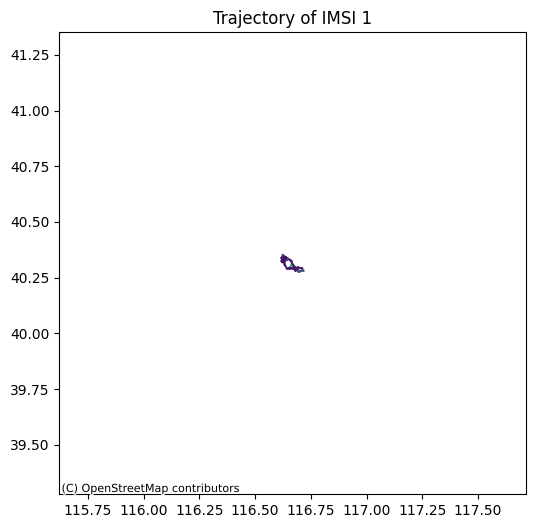

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 读取CSV文件
df = pd.read_csv('stay_durations_with_speed.csv')

# 筛选特定IMSI的行
df_IMSI = df[df['IMSI'] == 1]

# 为绘制轨迹准备数据
# 添加前一个点的经纬度列，并使用shift填充
df_IMSI['prev_Lon'] = df_IMSI['Longitude'].shift(1)
df_IMSI['prev_Lat'] = df_IMSI['Latitude'].shift(1)

# 将有效的点（非NaN）转换为Point对象
df_IMSI['Point'] = df_IMSI.apply(
    lambda row: Point(row['Longitude'], row['Latitude']) if pd.notna(row['Longitude']) else None, axis=1
)
df_IMSI['PrevPoint'] = df_IMSI.apply(
    lambda row: Point(row['prev_Lon'], row['prev_Lat']) if pd.notna(row['prev_Lon']) else None, axis=1
)

# 创建LineString对象，表示移动轨迹
df_IMSI['LineString'] = df_IMSI.apply(
    lambda row: LineString([row['PrevPoint'], row['Point']]) if row['PrevPoint'] is not None else None, axis=1
)

# 移除第一行和包含NaN的行
df_IMSI = df_IMSI.dropna(subset=['LineString'])

# 创建Geopandas GeoDataFrame
gdf = gpd.GeoDataFrame(df_IMSI, geometry='LineString')

# 为颜色映射定义归一化和映射
norm = Normalize(gdf['Speed (km/h)'].min(), gdf['Speed (km/h)'].max())
sm = ScalarMappable(norm=norm, cmap='viridis')

# 绘制地图
fig, ax = plt.subplots(figsize=(10, 6))

# 添加真实地图背景
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# 绘制轨迹线
for index, row in gdf.iterrows():
    color = sm.to_rgba(gdf.at[index, 'Speed (km/h)'])
    x, y = row['LineString'].xy
    ax.plot(x, y, color=color)

# 设置图表标题
ax.set_title('Trajectory of IMSI 1')

# 设置坐标轴限制（根据实际经纬度范围调整）
ax.set_xlim(min(df_IMSI['Longitude']) - 1, max(df_IMSI['Longitude']) + 1)
ax.set_ylim(min(df_IMSI['Latitude']) - 1, max(df_IMSI['Latitude']) + 1)

# 显示图表
plt.show()

/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_9670/528314285.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMSI['prev_Lon'] = df_IMSI['Longitude'].shift(1)
/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_9670/528314285.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMSI['prev_Lat'] = df_IMSI['Latitude'].shift(1)
/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/contextily/tile.py:623: UserWarning: The inferred zoom level of 27 is not valid for the curr

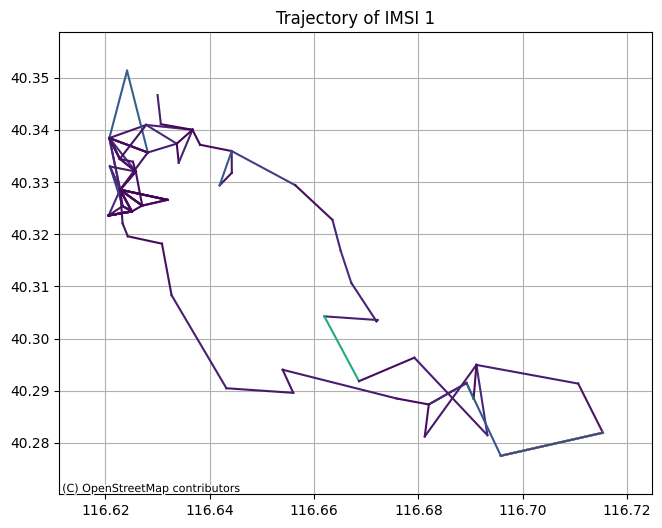

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 读取CSV文件
df = pd.read_csv('stay_durations_with_speed.csv')

# 筛选特定IMSI的行
df_IMSI = df[df['IMSI'] == 1]

# 为绘制轨迹准备数据
# 添加前一个点的经纬度列，并使用shift填充
df_IMSI['prev_Lon'] = df_IMSI['Longitude'].shift(1)
df_IMSI['prev_Lat'] = df_IMSI['Latitude'].shift(1)

# 过滤掉第一行和NaN行，因为没有前一个点可以连接
df_IMSI = df_IMSI.dropna(subset=['prev_Lon', 'prev_Lat']).iloc[1:]

# 将有效的点转换为LineString对象
df_IMSI['LineString'] = df_IMSI.apply(
    lambda row: LineString([(row['prev_Lon'], row['prev_Lat']), (row['Longitude'], row['Latitude'])]) if pd.notna(row['Longitude']) else None, axis=1
)

# 移除包含NaN的LineString行
df_IMSI = df_IMSI.dropna(subset=['LineString'])

# 创建Geopandas GeoDataFrame
gdf = gpd.GeoDataFrame(df_IMSI, geometry='LineString')

# 为颜色映射定义归一化和映射
speeds = df_IMSI['Speed (km/h)']
norm = Normalize(speeds.min(), speeds.max())
sm = ScalarMappable(norm=norm, cmap='viridis')

# 计算合适的x和y轴范围
x_padding = (df_IMSI['Longitude'].max() - df_IMSI['Longitude'].min()) * 0.1
y_padding = (df_IMSI['Latitude'].max() - df_IMSI['Latitude'].min()) * 0.1
ax_limits = {
    'xmin': df_IMSI['Longitude'].min() - x_padding,
    'xmax': df_IMSI['Longitude'].max() + x_padding,
    'ymin': df_IMSI['Latitude'].min() - y_padding,
    'ymax': df_IMSI['Latitude'].max() + y_padding
}

# 绘制地图
fig, ax = plt.subplots(figsize=(10, 6))

# 添加真实地图背景
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# 绘制轨迹线
for index, row in gdf.iterrows():
    color = sm.to_rgba(speeds[index])
    x, y = row['LineString'].xy
    ax.plot(x, y, color=color)

# 设置图表标题和坐标轴限制
ax.set_title('Trajectory of IMSI 1')
ax.set_xlim(ax_limits['xmin'], ax_limits['xmax'])
ax.set_ylim(ax_limits['ymin'], ax_limits['ymax'])

# 显示网格（可选）
ax.grid(True)

# 显示图表
plt.show()

In [ ]:
#现有问题：1）增加真实地图底图；☑️ 2）没有速度和颜色相关的图例；3）没有点顺序和箭头；4）没有点的停留时间


In [62]:
import pandas as pd
import plotly.graph_objects as go

# 读取CSV文件
df = pd.read_csv('stay_durations_with_speed.csv')

# 筛选特定IMSI的行
df_IMSI = df[df['IMSI'] == 1]

# 准备数据用于绘图
# 确保经纬度数据是正确的格式
df_IMSI = df_IMSI[['Longitude', 'Latitude']].dropna()

# 创建轨迹图
fig = go.Figure()

# 添加轨迹线
fig.add_trace(
    go.Scattermapbox(
        mode='lines',
        lon=df_IMSI['Longitude'],
        lat=df_IMSI['Latitude'],
        hoverinfo='text',
        text=df_IMSI.index.astype(str),  # 显示索引作为悬停信息
        name='Trajectory'
    )
)

# 更新图表布局
fig.update_layout(
    mapbox={
        'style': "open-street-map",  # 使用开放街道地图样式
        'center': {
            'lat': df_IMSI['Latitude'].mean(),
            'lon': df_IMSI['Longitude'].mean()
        },
        'zoom': 10  # 根据数据调整缩放级别
    },
    title='IMSI 1 Trajectory',
    showlegend=True
)

# 设置布局的大小
fig.update_layout(width=1000, height=1000)
# 显示图表
fig.show()

In [ ]:
    """
1、工作时段9：00- 11：30与14：00-17：00，筛选停留时间在2小时以上为工作地点；选择夜间休息时段 0：00-5：00，筛选停留时间在4小时以上为家。在表格中增加一列展示是否为家/工作地点。家为1，工作地点为2，其他为0
2、交通出行方式判断（1）2-10km/h:步行 （2）10-20km/h:自行车 （3）20-30km/h:电瓶车 （4）30-50km/h:公交车 （5）50-110km/h:汽车 （6）110-400km/h:火车+其他 （7）400-900km/h:飞机＋其他。（8）0-2km/h:静止没动。并增加一列
图形展示需求：
1、“家”用红色点标出，“工作地点”用黑色点标出；除此之外9：00- 11：30用黄色点标出、11：30-14：00用白色点标出、 14：00-17：00用蓝色点标出
2、不同交通出行方式用不同颜色的线标出（1）2-10km/h:步行 （2）10-20km/h:自行车 （3）20-30km/h:电瓶车 （4）30-50km/h:公交车 （5）50-110km/h:汽车 （6）110-400km/h:火车+其他 （7）400-900km/h:飞机＋其他。（8）0-2km/h:静止没动
4、图需要有图例


# 定义出行方式的函数
def get_transport_mode(speed):
    if speed <= 2:
        return '静止'
    elif 2 < speed <= 10:
        return '步行'
    elif 10 < speed <= 30:
        return '自行车'
    elif 30 < speed <= 110:
        return '公路交通'
    elif 110 < speed <= 400:
        return '地铁+其他'
    elif 400 < speed <= 900:
        return '飞机+其他'
    else:
        return '其他'
"""


In [80]:
import pandas as pd

# 读取数据
df = pd.read_csv('stay_durations_with_speed.csv')

# 将 Arrival Time 和 Departure Time 转换为 datetime 类型
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'])
df['Departure Time'] = pd.to_datetime(df['Departure Time'])

# 定义识别家和工作地点的函数
def identify_home_work(arrival, departure, duration):
    hour = arrival.hour
    stay_period = (departure - arrival).total_seconds() / 3600  # 转换为小时
    if (9 <= hour <= 11.5) or (14 <= hour <= 17):
        if stay_period >= 2:
            return 2  # 工作地点
    elif hour < 5 or hour >= 23:
        if stay_period >= 3:
            return 1  # 家
    return 0  # 其他

# 应用函数并创建新列 'Home_Work'
df['Home_Work'] = df.apply(lambda row: identify_home_work(
    row['Arrival Time'], row['Departure Time'], row['Stay Duration (hours)']), axis=1)

# 定义出行方式的函数
def get_transport_mode(speed):
    if speed <= 2:
        return 0
    elif 2 < speed <= 10:
        return 1
    elif 10 < speed <= 30:
        return 2
    elif 30 < speed <= 110:
        return 3
    elif 110 < speed <= 400:
        return 4
    elif 400 < speed <= 900:
        return 5
    else:
        return 6

# 应用函数并创建新列 'Transport_Mode'
df['Transport_Mode'] = df['Speed (km/h)'].apply(get_transport_mode)

# 显示结果
print(df.head())

   IMSI                 Location        Arrival Time      Departure Time  \
0     1  (116.630642, 40.341083) 2024-04-07 23:56:47 2024-04-08 06:13:36   
1     1  (116.636701, 40.340011) 2024-04-08 06:47:17 2024-04-08 06:47:17   
2     1  (116.627827, 40.340945) 2024-04-08 06:48:52 2024-04-08 06:48:52   
3     1  (116.620769, 40.338426) 2024-04-08 06:51:01 2024-04-08 08:11:50   
4     1  (116.622827, 40.328528) 2024-04-08 08:14:53 2024-04-08 08:16:40   

   Stay Duration (hours)  Stay Duration (seconds)   Longitude   Latitude  \
0               6.280278                  22609.0  116.630642  40.341083   
1               0.000000                      0.0  116.636701  40.340011   
2               0.000000                      0.0  116.627827  40.340945   
3               1.346944                   4849.0  116.620769  40.338426   
4               0.029722                    107.0  116.622827  40.328528   

   Speed (km/h)  Home_Work  Transport_Mode  
0      0.000000          1               

In [65]:
df = pd.read_csv('stay_durations_with_speed.csv')
print(df.head())

   IMSI                 Location         Arrival Time       Departure Time  \
0     1  (116.630642, 40.341083)  2024-04-07 23:56:47  2024-04-08 06:13:36   
1     1  (116.636701, 40.340011)  2024-04-08 06:47:17  2024-04-08 06:47:17   
2     1  (116.627827, 40.340945)  2024-04-08 06:48:52  2024-04-08 06:48:52   
3     1  (116.620769, 40.338426)  2024-04-08 06:51:01  2024-04-08 08:11:50   
4     1  (116.622827, 40.328528)  2024-04-08 08:14:53  2024-04-08 08:16:40   

   Stay Duration (hours)  Stay Duration (seconds)   Longitude   Latitude  \
0               6.280278                  22609.0  116.630642  40.341083   
1               0.000000                      0.0  116.636701  40.340011   
2               0.000000                      0.0  116.627827  40.340945   
3               1.346944                   4849.0  116.620769  40.338426   
4               0.029722                    107.0  116.622827  40.328528   

   Speed (km/h)  
0      0.000000  
1      0.939059  
2     28.771347  
3 

In [81]:
# 保存更新后的DataFrame到新的CSV文件
df.to_csv('updated_stay_durations_with_speed.csv', index=False)

In [82]:
import pandas as pd
import plotly.graph_objects as go

# 假设 df 是已经包含 'Home_Workplace' 和 'Transport_Mode' 列的 DataFrame

# 筛选特定 IMSI 的数据
df_IMSI = df[df['IMSI'] == 1].copy()

# 确保坐标和时间戳列是正确的数据类型
df_IMSI['Latitude'] = df_IMSI['Latitude'].astype(float)
df_IMSI['Longitude'] = df_IMSI['Longitude'].astype(float)


# 定义颜色映射
transport_mode_colors = {
    0: 'white',  # 静止
    1: 'lightyellow',  # 步行
    2: 'lightblue',  # 自行车
    3: 'darkblue',  # 公路交通
    4: 'black',  # 地铁+其他
    # 添加其他 Transport_Mode 颜色映射...
}

home_work_colors = {
    1: 'red',  # 家
    2: 'black',  # 工作地点
}

# 创建图形
fig = go.Figure()

# 添加地点标记
for _, row in df_IMSI.iterrows():
    color = home_work_colors.get(row['Home_Work'], 'green')
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['Latitude']],
            lon=[row['Longitude']],
            mode='markers',
            marker=dict(color=color, size=10),
            name=row['Home_Work'],
            hoverinfo='text',
            text=f"IMSI: {row['IMSI']}<br>Location: ({row['Longitude']}, {row['Latitude']})<br>Home/Work: {row['Home_Work']}"
        )
    )

# 优化：预先计算并存储线段数据
lines_data = []
for index in range(1, len(df_IMSI)):
    current_row = df_IMSI.iloc[index]
    prev_row = df_IMSI.iloc[index - 1]
    if current_row['IMSI'] == prev_row['IMSI']:
        lines_data.append({
            'lat': [prev_row['Latitude'], current_row['Latitude']],
            'lon': [prev_row['Longitude'], current_row['Longitude']],
            'color': transport_mode_colors.get(current_row['Transport_Mode'], 'grey')  # 默认其他颜色
        })

# 添加有向线段
for line in lines_data:
    fig.add_trace(
        go.Scattermapbox(
            lat=line['lat'],
            lon=line['lon'],
            mode='lines',
            line=dict(color=line['color'], width=2),
            hoverinfo='skip'
        )
    )

# 更新布局
fig.update_layout(
    mapbox={
        'style': "open-street-map",
        'center': {
            'lat': df_IMSI['Latitude'].mean(),
            'lon': df_IMSI['Longitude'].mean()
        },
        'zoom': 10
    },
    legend_title='Legend',
    title='IMSI 1 Movement and Transport Modes',
    showlegend=False
)

# 设置布局的大小
fig.update_layout(width=1000, height=1000)
# 显示图表
fig.show()

In [91]:
import pandas as pd
import plotly.graph_objects as go

# 读取CSV文件
df = pd.read_csv('updated_stay_durations_with_speed.csv')

# 筛选特定IMSI的数据，这里以IMSI=1为例
df_IMSI = df[df['IMSI'] == 1].copy()

# 确保坐标是浮点数类型
df_IMSI[['Longitude', 'Latitude']] = df_IMSI[['Longitude', 'Latitude']].astype(float)

# 定义颜色映射
home_work_colors = {
    1: 'red',    # 家
    2: 'black',  # 工作地点
    0: 'green',  # 其他
}
transport_mode_colors = {
    0: 'white',  # 静止
    1: 'lightyellow',  # 步行
    2: 'lightblue',  # 自行车
    3: 'darkblue',  # 公路交通
    4: 'black',  # 地铁+其他
    # 添加其他 Transport_Mode 颜色映射...
}

# 创建图形
fig = go.Figure()

# 添加地点标记
for _, row in df_IMSI.iterrows():
    color = home_work_colors.get(row['Home_Work'], 'green')
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['Latitude']],
            lon=[row['Longitude']],
            mode='markers',
            marker=dict(color=color, size=10),
            name=row['Home_Work'],
            hoverinfo='text',
            text=f"IMSI: {row['IMSI']}<br>Location: ({row['Longitude']}, {row['Latitude']})<br>Home/Work: {row['Home_Work']}"
        )
    )

# 添加有向线段
for index in range(1, len(df_IMSI)):
    current_row = df_IMSI.iloc[index]
    prev_row = df_IMSI.iloc[index - 1]
    
    if current_row['IMSI'] == prev_row['IMSI']:
        color = transport_mode_colors.get(current_row['Transport_Mode'], 'grey')
        fig.add_trace(
            go.Scattermapbox(
                lat=[prev_row['Latitude'], current_row['Latitude']],
                lon=[prev_row['Longitude'], current_row['Longitude']],
                mode='lines',
                line=dict(color=color, width=1),
                hoverinfo='skip'
            )
        )

# 更新布局
fig.update_layout(
    mapbox={
        'style': "open-street-map",
        'center': {
            'lat': df_IMSI['Latitude'].mean(),
            'lon': df_IMSI['Longitude'].mean()
        },
        'zoom': 10
    },
    title='IMSI 1 Movement and Transport Modes'
)

# 添加自定义图例
legend_items = []
for label, color in home_work_colors.items():
    legend_items.append({
        'tracename': f"Home/Work: {label}",
        'color': color
    })
for mode, color in transport_mode_colors.items():
    legend_items.append({
        'tracename': f"Transport Mode: {mode}",
        'color': color
    })

# 创建一个空的 Scattermapbox 用于图例
legend_trace = go.Scattermapbox(mode="markers", showlegend=True, legendgroup="Home/Work", name="Home/Work Legend")
fig.add_trace(legend_trace)

for item in legend_items:
    group = item.pop('tracename').split(':')[0]
    if group == "Home/Work":
        item['legendgroup'] = "Home/Work"
    else:
        item['legendgroup'] = f"Transport Mode {group}"
    fig.update_traces(legend_trace, item)

# 设置布局的大小
fig.update_layout(width=1000, height=1000)

# 显示图表
fig.show()

In [99]:
#可用最终版
import pandas as pd
import plotly.graph_objects as go



# 筛选特定IMSI的数据，这里以IMSI=1为例
df_IMSI = df[df['IMSI'] == 1].copy()

# 确保坐标是浮点数类型
df_IMSI[['Longitude', 'Latitude']] = df_IMSI[['Longitude', 'Latitude']].astype(float)

# 定义颜色映射
home_work_colors = {
    1: 'red',    # 家
    2: 'black',  # 工作地点
    0: 'green',  # 其他
}
transport_mode_colors = {
    0: 'white',  # 静止
    1: 'lightyellow',  # 步行
    2: 'lightblue',  # 自行车
    3: 'darkblue',  # 公路交通
    4: 'black',  # 地铁+其他
    # 添加其他 Transport_Mode 颜色映射...
}

# 创建图形
fig = go.Figure()

# 首先添加其他地点标记，除了家
for _, row in df_IMSI[df_IMSI['Home_Work'] != 1].iterrows():
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['Latitude']],
            lon=[row['Longitude']],
            mode='markers',
            marker=dict(color=home_work_colors.get(row['Home_Work'], 'green'), size=10),
            name=row['Home_Work'],
            hoverinfo='text',
            text=f"IMSI: {row['IMSI']}<br>Location: ({row['Longitude']}, {row['Latitude']})<br>Home/Work: {row['Home_Work']}"
        )
    )

# 然后添加家的地点标记，使用更大的点
for _, row in df_IMSI[df_IMSI['Home_Work'] == 1].iterrows():
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['Latitude']],
            lon=[row['Longitude']],
            mode='markers',
            marker=dict(color=home_work_colors.get(row['Home_Work'], 'red'), size=20),  # 增大点的大小
            name='Home',
            hoverinfo='text',
            text=f"IMSI: {row['IMSI']}<br>Location: Home ({row['Longitude']}, {row['Latitude']})"
        )
    )

# 添加有向线段
for index in range(1, len(df_IMSI)):
    current_row = df_IMSI.iloc[index]
    prev_row = df_IMSI.iloc[index - 1]
    
    if current_row['IMSI'] == prev_row['IMSI']:
        color = transport_mode_colors.get(current_row['Transport_Mode'], 'grey')
        fig.add_trace(
            go.Scattermapbox(
                lat=[prev_row['Latitude'], current_row['Latitude']],
                lon=[prev_row['Longitude'], current_row['Longitude']],
                mode='lines',
                line=dict(color=color, width=2),
                hoverinfo='skip'
            )
        )

# 更新布局
fig.update_layout(
    mapbox={
        'style': "open-street-map",
        'center': {
            'lat': df_IMSI['Latitude'].mean(),
            'lon': df_IMSI['Longitude'].mean()
        },
        'zoom': 12  # 可能需要调整以更好地显示点
    },
    title='IMSI 1 Movement and Transport Modes',
    showlegend=True
)

# 设置布局的大小
fig.update_layout(width=1000, height=1000)

# 显示图表
fig.show()

In [90]:
import pandas as pd
import plotly.graph_objects as go



# 筛选特定IMSI的数据，这里以IMSI=2为例
df_IMSI = df[df['IMSI'] == 2].copy()

# 确保坐标是浮点数类型
df_IMSI[['Longitude', 'Latitude']] = df_IMSI[['Longitude', 'Latitude']].astype(float)

# 定义颜色映射
home_work_colors = {
    1: 'red',    # 家
    2: 'black',  # 工作地点
    0: 'green',  # 其他
}
transport_mode_colors = {
    0: 'white',  # 静止
    1: 'lightyellow',  # 步行
    2: 'lightblue',  # 自行车
    3: 'darkblue',  # 公路交通
    4: 'black',  # 地铁+其他
    # 添加其他 Transport_Mode 颜色映射...
}

# 创建图形
fig = go.Figure()

# 添加地点标记
for _, row in df_IMSI.iterrows():
    color = home_work_colors.get(row['Home_Work'], 'green')
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['Latitude']],
            lon=[row['Longitude']],
            mode='markers',
            marker=dict(color=color, size=10),
            name=row['Home_Work'],
            hoverinfo='text',
            text=f"IMSI: {row['IMSI']}<br>Location: ({row['Longitude']}, {row['Latitude']})<br>Home/Work: {row['Home_Work']}"
        )
    )

# 添加有向线段
for index in range(1, len(df_IMSI)):
    current_row = df_IMSI.iloc[index]
    prev_row = df_IMSI.iloc[index - 1]
    
    if current_row['IMSI'] == prev_row['IMSI']:
        color = transport_mode_colors.get(current_row['Transport_Mode'], 'grey')
        fig.add_trace(
            go.Scattermapbox(
                lat=[prev_row['Latitude'], current_row['Latitude']],
                lon=[prev_row['Longitude'], current_row['Longitude']],
                mode='lines',
                line=dict(color=color, width=1),
                hoverinfo='skip'
            )
        )

# 更新布局
fig.update_layout(
    mapbox={
        'style': "open-street-map",
        'center': {
            'lat': df_IMSI['Latitude'].mean(),
            'lon': df_IMSI['Longitude'].mean()
        },
        'zoom': 10
    },
    title='IMSI 2 Movement and Transport Modes'
)

# 添加自定义图例
legend_items = []
for label, color in home_work_colors.items():
    legend_items.append({
        'tracename': f"Home/Work: {label}",
        'color': color
    })
for mode, color in transport_mode_colors.items():
    legend_items.append({
        'tracename': f"Transport Mode: {mode}",
        'color': color
    })

# 创建一个空的 Scattermapbox 用于图例
legend_trace = go.Scattermapbox(mode="markers", showlegend=True, legendgroup="Home/Work", name="Home/Work Legend")
fig.add_trace(legend_trace)

for item in legend_items:
    group = item.pop('tracename').split(':')[0]
    if group == "Home/Work":
        item['legendgroup'] = "Home/Work"
    else:
        item['legendgroup'] = f"Transport Mode {group}"
    fig.update_traces(legend_trace, item)

# 设置布局的大小
fig.update_layout(width=1000, height=1000)

# 显示图表
fig.show()

In [92]:
import pandas as pd
import plotly.graph_objects as go


# 筛选特定IMSI的数据，这里以IMSI=3为例
df_IMSI = df[df['IMSI'] == 3].copy()

# 确保坐标是浮点数类型
df_IMSI[['Longitude', 'Latitude']] = df_IMSI[['Longitude', 'Latitude']].astype(float)

# 定义颜色映射
home_work_colors = {
    1: 'red',    # 家
    2: 'black',  # 工作地点
    0: 'green',  # 其他
}
transport_mode_colors = {
    0: 'white',  # 静止
    1: 'lightyellow',  # 步行
    2: 'lightblue',  # 自行车
    3: 'darkblue',  # 公路交通
    4: 'black',  # 地铁+其他
    # 添加其他 Transport_Mode 颜色映射...
}

# 创建图形
fig = go.Figure()

# 添加地点标记
for _, row in df_IMSI.iterrows():
    color = home_work_colors.get(row['Home_Work'], 'green')
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['Latitude']],
            lon=[row['Longitude']],
            mode='markers',
            marker=dict(color=color, size=10),
            name=row['Home_Work'],
            hoverinfo='text',
            text=f"IMSI: {row['IMSI']}<br>Location: ({row['Longitude']}, {row['Latitude']})<br>Home/Work: {row['Home_Work']}"
        )
    )

# 添加有向线段
for index in range(1, len(df_IMSI)):
    current_row = df_IMSI.iloc[index]
    prev_row = df_IMSI.iloc[index - 1]
    
    if current_row['IMSI'] == prev_row['IMSI']:
        color = transport_mode_colors.get(current_row['Transport_Mode'], 'grey')
        fig.add_trace(
            go.Scattermapbox(
                lat=[prev_row['Latitude'], current_row['Latitude']],
                lon=[prev_row['Longitude'], current_row['Longitude']],
                mode='lines',
                line=dict(color=color, width=1),
                hoverinfo='skip'
            )
        )

# 更新布局
fig.update_layout(
    mapbox={
        'style': "open-street-map",
        'center': {
            'lat': df_IMSI['Latitude'].mean(),
            'lon': df_IMSI['Longitude'].mean()
        },
        'zoom': 10
    },
    title='IMSI 3 Movement and Transport Modes'
)

# 添加自定义图例
legend_items = []
for label, color in home_work_colors.items():
    legend_items.append({
        'tracename': f"Home/Work: {label}",
        'color': color
    })
for mode, color in transport_mode_colors.items():
    legend_items.append({
        'tracename': f"Transport Mode: {mode}",
        'color': color
    })

# 创建一个空的 Scattermapbox 用于图例
legend_trace = go.Scattermapbox(mode="markers", showlegend=True, legendgroup="Home/Work", name="Home/Work Legend")
fig.add_trace(legend_trace)

for item in legend_items:
    group = item.pop('tracename').split(':')[0]
    if group == "Home/Work":
        item['legendgroup'] = "Home/Work"
    else:
        item['legendgroup'] = f"Transport Mode {group}"
    fig.update_traces(legend_trace, item)

# 设置布局的大小
fig.update_layout(width=1000, height=1000)

# 显示图表
fig.show()

In [100]:
#可用最终版
import pandas as pd
import plotly.graph_objects as go



# 筛选特定IMSI的数据，这里以IMSI=4为例
df_IMSI = df[df['IMSI'] == 4].copy()

# 确保坐标是浮点数类型
df_IMSI[['Longitude', 'Latitude']] = df_IMSI[['Longitude', 'Latitude']].astype(float)

# 定义颜色映射
home_work_colors = {
    1: 'red',    # 家
    2: 'black',  # 工作地点
    0: 'green',  # 其他
}
transport_mode_colors = {
    0: 'white',  # 静止
    1: 'lightyellow',  # 步行
    2: 'lightblue',  # 自行车
    3: 'darkblue',  # 公路交通
    4: 'black',  # 地铁+其他
    # 添加其他 Transport_Mode 颜色映射...
}

# 创建图形
fig = go.Figure()

# 首先添加其他地点标记，除了家
for _, row in df_IMSI[df_IMSI['Home_Work'] != 1].iterrows():
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['Latitude']],
            lon=[row['Longitude']],
            mode='markers',
            marker=dict(color=home_work_colors.get(row['Home_Work'], 'green'), size=10),
            name=row['Home_Work'],
            hoverinfo='text',
            text=f"IMSI: {row['IMSI']}<br>Location: ({row['Longitude']}, {row['Latitude']})<br>Home/Work: {row['Home_Work']}"
        )
    )

# 然后添加家的地点标记，使用更大的点
for _, row in df_IMSI[df_IMSI['Home_Work'] == 1].iterrows():
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['Latitude']],
            lon=[row['Longitude']],
            mode='markers',
            marker=dict(color=home_work_colors.get(row['Home_Work'], 'red'), size=20),  # 增大点的大小
            name='Home',
            hoverinfo='text',
            text=f"IMSI: {row['IMSI']}<br>Location: Home ({row['Longitude']}, {row['Latitude']})"
        )
    )

# 添加有向线段
for index in range(1, len(df_IMSI)):
    current_row = df_IMSI.iloc[index]
    prev_row = df_IMSI.iloc[index - 1]
    
    if current_row['IMSI'] == prev_row['IMSI']:
        color = transport_mode_colors.get(current_row['Transport_Mode'], 'grey')
        fig.add_trace(
            go.Scattermapbox(
                lat=[prev_row['Latitude'], current_row['Latitude']],
                lon=[prev_row['Longitude'], current_row['Longitude']],
                mode='lines',
                line=dict(color=color, width=2),
                hoverinfo='skip'
            )
        )

# 更新布局
fig.update_layout(
    mapbox={
        'style': "open-street-map",
        'center': {
            'lat': df_IMSI['Latitude'].mean(),
            'lon': df_IMSI['Longitude'].mean()
        },
        'zoom': 12  # 可能需要调整以更好地显示点
    },
    title='IMSI 4 Movement and Transport Modes',
    showlegend=True
)

# 设置布局的大小
fig.update_layout(width=1000, height=1000)

# 显示图表
fig.show()

In [115]:
#可用最终版
import pandas as pd
import plotly.graph_objects as go



# 筛选特定IMSI的数据，这里以IMSI=116为例
df_IMSI = df[df['IMSI'] == 953].copy()

# 确保坐标是浮点数类型
df_IMSI[['Longitude', 'Latitude']] = df_IMSI[['Longitude', 'Latitude']].astype(float)

# 定义颜色映射
home_work_colors = {
    1: 'red',    # 家
    2: 'black',  # 工作地点
    0: 'green',  # 其他
}
transport_mode_colors = {
    0: 'white',  # 静止
    1: 'lightyellow',  # 步行
    2: 'lightblue',  # 自行车
    3: 'darkblue',  # 公路交通
    4: 'black',  # 地铁+其他
    # 添加其他 Transport_Mode 颜色映射...
}

# 创建图形
fig = go.Figure()

# 首先添加其他地点标记，除了家
for _, row in df_IMSI[df_IMSI['Home_Work'] != 1].iterrows():
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['Latitude']],
            lon=[row['Longitude']],
            mode='markers',
            marker=dict(color=home_work_colors.get(row['Home_Work'], 'green'), size=10),
            name=row['Home_Work'],
            hoverinfo='text',
            text=f"IMSI: {row['IMSI']}<br>Location: ({row['Longitude']}, {row['Latitude']})<br>Home/Work: {row['Home_Work']}"
        )
    )

# 然后添加家的地点标记，使用更大的点
for _, row in df_IMSI[df_IMSI['Home_Work'] == 1].iterrows():
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['Latitude']],
            lon=[row['Longitude']],
            mode='markers',
            marker=dict(color=home_work_colors.get(row['Home_Work'], 'red'), size=20),  # 增大点的大小
            name='Home',
            hoverinfo='text',
            text=f"IMSI: {row['IMSI']}<br>Location: Home ({row['Longitude']}, {row['Latitude']})"
        )
    )

# 添加有向线段
for index in range(1, len(df_IMSI)):
    current_row = df_IMSI.iloc[index]
    prev_row = df_IMSI.iloc[index - 1]
    
    if current_row['IMSI'] == prev_row['IMSI']:
        color = transport_mode_colors.get(current_row['Transport_Mode'], 'grey')
        fig.add_trace(
            go.Scattermapbox(
                lat=[prev_row['Latitude'], current_row['Latitude']],
                lon=[prev_row['Longitude'], current_row['Longitude']],
                mode='lines',
                line=dict(color=color, width=2),
                hoverinfo='skip'
            )
        )

# 更新布局
fig.update_layout(
    mapbox={
        'style': "open-street-map",
        'center': {
            'lat': df_IMSI['Latitude'].mean(),
            'lon': df_IMSI['Longitude'].mean()
        },
        'zoom': 12  # 可能需要调整以更好地显示点
    },
    title='IMSI 116 Movement and Transport Modes',
    showlegend=True
)

# 设置布局的大小
fig.update_layout(width=1000, height=1000)

# 显示图表
fig.show()

In [101]:
import pandas as pd

# 读取数据
df = pd.read_csv('updated_stay_durations_with_speed.csv')

# 查看数据的前几行
print(df.head())

# 获取数据的描述性统计
print(df.describe())

   IMSI                 Location         Arrival Time       Departure Time  \
0     1  (116.630642, 40.341083)  2024-04-07 23:56:47  2024-04-08 06:13:36   
1     1  (116.636701, 40.340011)  2024-04-08 06:47:17  2024-04-08 06:47:17   
2     1  (116.627827, 40.340945)  2024-04-08 06:48:52  2024-04-08 06:48:52   
3     1  (116.620769, 40.338426)  2024-04-08 06:51:01  2024-04-08 08:11:50   
4     1  (116.622827, 40.328528)  2024-04-08 08:14:53  2024-04-08 08:16:40   

   Stay Duration (hours)  Stay Duration (seconds)   Longitude   Latitude  \
0               6.280278                  22609.0  116.630642  40.341083   
1               0.000000                      0.0  116.636701  40.340011   
2               0.000000                      0.0  116.627827  40.340945   
3               1.346944                   4849.0  116.620769  40.338426   
4               0.029722                    107.0  116.622827  40.328528   

   Speed (km/h)  Home_Work  Transport_Mode  
0      0.000000          1   

In [102]:
import pandas as pd

# 假设 df 是已经加载的 DataFrame，包含 'IMSI', 'Speed (km/h)' 等列

# 过滤掉速度为零的记录，然后计算每个 IMSI 的特征
def calculate_features(group):
    # 过滤掉静止的记录（速度为2）
    filtered_group = group[group['Speed (km/h)'] > 2]
    
    if len(filtered_group) == 0:  # 如果过滤后没有数据，返回NaN或适当值
        return {
            'IMSI': group['IMSI'].iloc[0],
            'Average_Speed': None,  # 或者选择一个表示“无数据”的值
            'Total_Stay_Duration': filtered_group['Stay Duration (hours)'].sum(),
            'Daily_Distance': 0,  # 如果没有移动，距离为0
            'Location_Count': len(group)  # 即使没有移动，地点数量仍然计算
        }
    else:
        return {
            'IMSI': group['IMSI'].iloc[0],
            'Average_Speed': filtered_group['Speed (km/h)'].mean(),
            'Total_Stay_Duration': filtered_group['Stay Duration (hours)'].sum(),
            'Daily_Distance': (filtered_group['Speed (km/h)'] * 
                               filtered_group['Stay Duration (seconds)'] / 3600).sum(),
            'Location_Count': filtered_group['Longitude'].nunique()
        }

# 使用 groupby 和 apply 应用函数计算每个 IMSI 的特征
features = df.groupby('IMSI').apply(calculate_features).reset_index()

# 查看新表格的前几行
print(features.head())

# 保存新表格到 CSV 文件
features.to_csv('IMSI_features.csv', index=False)

   IMSI                                                  0
0     1  {'IMSI': 1, 'Average_Speed': 29.29706908750168...
1     2  {'IMSI': 2, 'Average_Speed': 3.843933681744294...
2     3  {'IMSI': 3, 'Average_Speed': 59.50434299412775...
3     4  {'IMSI': 4, 'Average_Speed': 35.91732748017145...
4     5  {'IMSI': 5, 'Average_Speed': 18.56156608692222...


In [108]:
import pandas as pd

# 假设 df 是已经加载的 DataFrame，包含 'IMSI', 'Speed (km/h)', 'Stay Duration (hours)', 'Longitude', 'Latitude' 等列

# 定义特征名称
feature_names = ['IMSI', 'Average_Speed', 'Total_Stay_Duration', 'Daily_Distance', 'Location_Count']

# 初始化一个空列表来收集特征数据
features_list = []

# 定义 calculate_features 函数以计算每个 IMSI 的特征
def calculate_features(group):
    # 过滤掉静止的记录（Speed (km/h) > 2）
    filtered_group = group[group['Speed (km/h)'] > 2]
    average_speed = filtered_group['Speed (km/h)'].mean() if not filtered_group.empty else 0
    daily_distance = (filtered_group['Speed (km/h)'] * (filtered_group['Stay Duration (seconds)'] / 3600)).sum() if not filtered_group.empty else 0
    location_count = group['Longitude'].nunique()
    
    return {
        'IMSI': group['IMSI'].iloc[0],  # 取第一个值作为代表
        'Average_Speed': average_speed,
        'Total_Stay_Duration': group['Stay Duration (hours)'].sum(),
        'Daily_Distance': daily_distance,
        'Location_Count': location_count
    }

# 使用 groupby 和 apply 应用函数计算每个 IMSI 的特征
for imsi, group in df.groupby('IMSI'):
    features_list.append(calculate_features(group))

# 使用列表创建新的 DataFrame
features_df = pd.DataFrame(features_list)

# 查看新表格的前几行
print(features_df.head())

# 保存新表格到 CSV 文件
features_df.to_csv('IMSI_features.csv', index=False)

   IMSI  Average_Speed  Total_Stay_Duration  Daily_Distance  Location_Count
0     1      29.297069            13.176111      107.401117              52
1     2       3.843934            15.886111       22.508912               9
2     3      59.504343            14.074167      731.928955               5
3     4      35.917327             8.162222       12.121183              77
4     5      18.561566            19.243056       48.208570              42


In [116]:
#下面根据上述聚类
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# 读取 CSV 文件
features_df = pd.read_csv('IMSI_features.csv')
from sklearn.preprocessing import StandardScaler

# 选择特征列进行聚类分析
X = features_df[['Average_Speed', 'Total_Stay_Duration', 'Daily_Distance', 'Location_Count']]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/sunqian/anaconda3/envs/cy

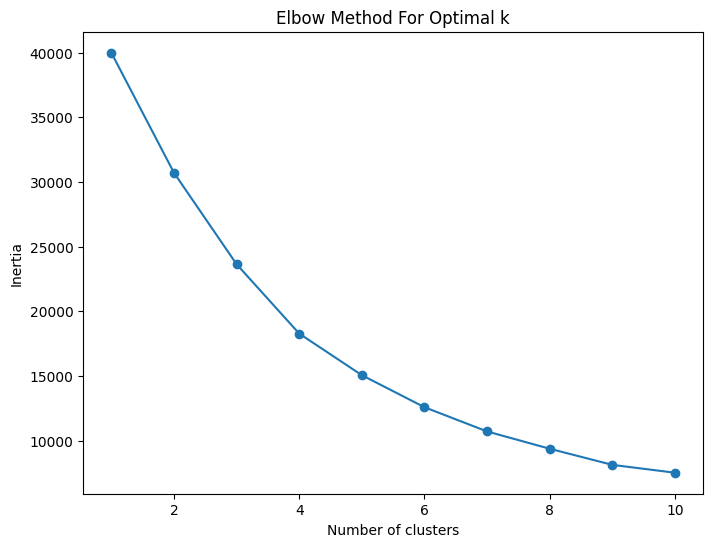

In [117]:
# 尝试不同的聚类数，并计算每个聚类数的总内部平方和（within-cluster sum of squares）
inertia = []
for k in range(1, 11):  # 测试 1 到 10 个聚类
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 绘制肘部曲线图
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [118]:
# 肘部法则建议的最佳聚类数是 5
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=0)

In [119]:
# 将聚类结果添加到 DataFrame 的新列中
features_df['Cluster'] = kmeans.labels_

In [120]:
# 保存更新后的 DataFrame 到新的 CSV 文件
features_df.to_csv('IMSI_features_with_clusters.csv', index=False)

In [125]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

# 加载数据
df = pd.read_csv('IMSI_features_with_clusters.csv')

# 假设聚类已经完成，并且'Cluster'列包含了每个IMSI的聚类标签
# 如果没有聚类，需要先进行聚类
# kmeans = KMeans(n_clusters=你的聚类数量)
# kmeans.fit(df[['Average_Speed', 'Total_Stay_Duration', 'Daily_Distance', 'Location_Count']])
# df['Cluster'] = kmeans.labels_

# 确定聚类的数量
n_clusters = df['Cluster'].nunique()

# 使用KMeans对象来获取聚类中心
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df[['Average_Speed', 'Total_Stay_Duration', 'Daily_Distance', 'Location_Count']])
cluster_centers = kmeans.cluster_centers_

# 计算每个'IMSI'与各自聚类中心的距离
distances = euclidean_distances(df[['Average_Speed', 'Total_Stay_Duration', 'Daily_Distance', 'Location_Count']], cluster_centers)

# 将距离添加到原始DataFrame中
df['Distance_to_Center'] = distances.min(axis=1)  # 找到最近的中心的距离

# 对每个聚类，找到具有最小距离的'IMSI'
representative_IMSIs = df.groupby('Cluster').apply(lambda x: x.loc[x['Distance_to_Center'].idxmin(), 'IMSI'])

# 打印每个聚类的代表性'IMSI'
for cluster, imsi in representative_IMSIs.items():
    print(f"Cluster {cluster} is represented by IMSI {imsi}")

Cluster 0 is represented by IMSI 9786
Cluster 1 is represented by IMSI 3319
Cluster 2 is represented by IMSI 7302
Cluster 3 is represented by IMSI 3922
Cluster 4 is represented by IMSI 4153


/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

